In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [4]:
style.use("ggplot")

In [5]:
# Se importa el dataset con los datos del estudiante
data = pd.read_csv("student-mat.csv", sep=";")

In [6]:
# Se selecciona el valor a predecir
predict = "notaFinal"


In [9]:
# Se enlistan las variables que queremos usar para predecir
data = data[["primerParcial", "segundoParcial", "tiempoestudio", "notaFinal"]]
data = shuffle(data)

In [10]:
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

In [11]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

In [12]:
# Entrenamos el modelo varias veces para encontrar la precision mas alta
mejor = 0
for _ in range(200):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Precisión: " + str(acc))

    # Se guarda la mayor precisión
    if (acc > mejor):
        mejor = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
print("Precisión más alta:", mejor)


Precisión: 0.9011410996847954
Precisión: 0.8216411543068051
Precisión: 0.8673205957327071
Precisión: 0.6933287244501773
Precisión: 0.7525535779146444
Precisión: 0.866740222075585
Precisión: 0.9031990993963496
Precisión: 0.7505035786890305
Precisión: 0.8502964937306057
Precisión: 0.7035983501447602
Precisión: 0.8253397585910288
Precisión: 0.8182958346056828
Precisión: 0.8072979947197616
Precisión: 0.8422136336816659
Precisión: 0.8735806145450754
Precisión: 0.7617461222560663
Precisión: 0.7326681207399289
Precisión: 0.7653336262836061
Precisión: 0.8592178502970997
Precisión: 0.7896724320180336
Precisión: 0.6833138241554545
Precisión: 0.8243406594916425
Precisión: 0.7683298013376542
Precisión: 0.8629001602055297
Precisión: 0.6864124728421425
Precisión: 0.8037714644424286
Precisión: 0.7208822853845515
Precisión: 0.9159567487975169
Precisión: 0.8795953140900983
Precisión: 0.882307515284267
Precisión: 0.7118697013069726
Precisión: 0.8312491746432478
Precisión: 0.7872546585884184
Precisión: 0

In [13]:
# Se carga el modelo
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

In [14]:
print("-------------------------")
print('Coeficiente: \n', linear.coef_)
print('Intercepción: \n', linear.intercept_)
print("-------------------------")

predicciones = linear.predict(x_test)

-------------------------
Coeficiente: 
 [ 0.16467442  0.99107803 -0.1624685 ]
Intercepción: 
 -1.6826992523908633
-------------------------


No handles with labels found to put in legend.


Nota Final Predecida: 17.4754808936883 Data: [16 17  2] Nota Final: 17
Nota Final Predecida: 8.22946133121011 Data: [8 9 2] Nota Final: 10
Nota Final Predecida: 14.9970956744629 Data: [12 15  1] Nota Final: 15
Nota Final Predecida: 8.396341659815965 Data: [10  9  3] Nota Final: 9
Nota Final Predecida: 15.328650419348493 Data: [15 15  2] Nota Final: 15
Nota Final Predecida: 9.224951184892374 Data: [10 10  4] Nota Final: 11
Nota Final Predecida: 14.006017645432866 Data: [12 14  1] Nota Final: 15
Nota Final Predecida: 4.098268886484119 Data: [6 5 1] Nota Final: 6
Nota Final Predecida: 7.0715029735742245 Data: [6 8 1] Nota Final: 8
Nota Final Predecida: 7.073708885900338 Data: [7 8 2] Nota Final: 8
Nota Final Predecida: 4.098268886484119 Data: [6 5 1] Nota Final: 5
Nota Final Predecida: 15.328650419348493 Data: [15 15  2] Nota Final: 16
Nota Final Predecida: 8.06258100260426 Data: [6 9 1] Nota Final: 8
Nota Final Predecida: 18.79811366760393 Data: [19 18  3] Nota Final: 19
Nota Final Prede

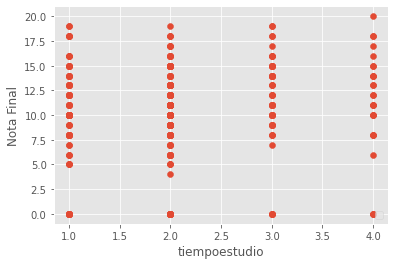

In [16]:
# Imprime las predicciones, las variables usadas y la nota final
for x in range(len(predicciones)):
    print("Nota Final Predecida:", predicciones[x], "Data:", x_test[x], "Nota Final:", y_test[x])

# Creamos una visualizacion con un parametro elegido
plot = "tiempoestudio"
plt.scatter(data[plot], data["notaFinal"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Nota Final")
plt.show()